Import Libraries

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from PIL import Image
import PIL
# import cv2

import keras
from keras.preprocessing.image import load_img
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, AveragePooling2D
from keras.layers import Reshape, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.regularizers import l1_l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix

%matplotlib inline
%env JOBLIB_TEMP_FOLDER=/tmp

Using TensorFlow backend.
/anaconda3/envs/MLEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/MLEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/MLEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/MLEnv/lib/python3.7/site-packages/tensorflo

env: JOBLIB_TEMP_FOLDER=/tmp


MODEL

In [2]:
# parameters
batch_size = 128
nb_classes = 10
nb_epoch = 200
input_dim = 32*32
resolution = 32
reg = l1_l2(l1=0, l2=0.02)

LeNet-5

In [3]:
# define path to save model
model_path = './LeNet_notMNIST.h5'
# prepare callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy', 
        patience=20,
        mode='max',
        verbose=1),
    ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1),
    ReduceLROnPlateau(
        factor=0.1, 
        patience=5, 
        min_lr=0.00001, 
        verbose=1)
]

In [4]:
model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(BatchNormalization())

model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(AveragePooling2D())

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(units=120, activation='relu', kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=84, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=10, activation = 'softmax'))

Compile and fit the model

In [5]:
model.load_weights("LeNet_notMNIST.h5")
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

Evaluate the accuracy on the images used to create bubbles dataset

In [6]:
def fullprint(*args, **kwargs):
  from pprint import pprint
  import numpy
  opt = numpy.get_printoptions()
  numpy.set_printoptions(threshold=numpy.inf)
  pprint(*args, **kwargs)
  numpy.set_printoptions(**opt)

In [6]:
def cleanGrayscaleImage(image):
  # maxValue = np.amax(image)
  for i in range(np.shape(image)[0]):
    for j in range(np.shape(image)[1]):
      if image[i][j] < 0:
        image[i][j] = 0
  # normalizedImage = image*(255/int(maxValue))
  scaledImageAsInt = image.astype(np.int16)

  return scaledImageAsInt

In [197]:
# DATA_PATH = '/content/drive/My Drive/large_bubbles_slim_font_with_filters'

# X = []
# labels = []
# for image in os.listdir(DATA_PATH):
#   print("image: ", image)
#   if ".png" not in image:
#     continue
#   file_path = DATA_PATH + '/' + image
#   img = Image.open(file_path)
#   img.load()
#   img_data = np.asarray(img)
#   img_resized = cv2.resize(img_data, (32, 32), interpolation = cv2.INTER_CUBIC)
#   finalImage = cleanGrayscaleImage(img_resized)
#   # add image to dataset
#   X.append(finalImage)
#   # add label to labels
#   labelName = image.replace(".png", "")
#   labels.append(labelName)

# N = len(X) # number of images
# img_size = len(X[0]) # width of image
# X = np.asarray(X).reshape(N, img_size, img_size,1) # add our single channel for processing purposes
# labels_cat = to_categorical(list(map(lambda x: ord(x)-ord('A'), labels)), 10) # convert to one-hot
# labels = np.asarray(list(map(lambda x: ord(x)-ord('A'), labels)))

# print(N)
# print(img_size)
# print(labels_cat)
# print(labels)

In [0]:
baseline_score = model.evaluate(X, labels_cat, verbose = 0)
print("Baseline accuracy: ", baseline_score[1])

for sample in range(10):
  prediction = model.predict(np.asarray([X[sample]]))
  print(prediction)

Baseline accuracy:  1.0
[[9.9971837e-01 1.2265701e-05 8.0323443e-06 7.9802103e-06 1.4644912e-05
  1.6322512e-04 1.8406939e-05 4.3629912e-05 9.2451364e-06 4.1759172e-06]]
[[1.1098920e-05 9.9981898e-01 1.5289381e-05 1.0057413e-04 9.9302115e-06
  2.0143129e-06 1.7953824e-05 9.8644514e-06 1.3132653e-05 1.1618282e-06]]
[[1.9382293e-04 4.0788214e-05 9.9788922e-01 1.0038068e-04 3.1356537e-04
  3.2136235e-05 1.1915142e-03 3.6242109e-05 1.5719433e-04 4.5109831e-05]]
[[4.1130257e-05 6.4505811e-04 5.4975731e-05 9.9867320e-01 9.6079741e-05
  5.5510576e-05 6.8453577e-05 4.9763061e-05 2.2520988e-04 9.0600937e-05]]
[[3.0517880e-05 1.5153828e-04 1.9141551e-04 4.3604294e-05 9.9869031e-01
  4.2303238e-04 9.0614238e-05 8.4760562e-05 7.5960692e-05 2.1831234e-04]]
[[3.6062778e-04 6.7167603e-05 1.0999459e-04 3.4521701e-05 8.3477743e-04
  9.9783427e-01 4.5360552e-04 1.5811632e-04 5.2585223e-05 9.4296971e-05]]
[[2.1033791e-06 5.9534153e-07 1.7963595e-05 1.0207775e-06 1.8769761e-06
  1.6559771e-06 9.9997211e-0

Evaluate model on bubbled images

Function to load all images in a given directory


In [10]:
def readImagesAndLabelsInDirectory(path):
  X = []
  labels = []
  for directory in os.listdir(path):
    if "." in directory:
        continue
    for image in os.listdir(path + "/" + directory):
      if ".png" not in image:
        continue
      file_path = path + '/' + directory + "/" + image
      img = Image.open(file_path)
      img.load()
      img_resized = img.resize((32, 32), resample = PIL.Image.LANCZOS)
      img_data = np.asarray(img_resized)
      finalImage = cleanGrayscaleImage(img_data)
      # add image to dataset
      X.append(finalImage)
      # add label to labels
      labels.append(directory)

  N = len(X) # number of images
  img_size = len(X[0]) # width of image
  X = np.asarray(X).reshape(N, img_size, img_size,1) # add our single channel for processing purposes
  labels_cat = to_categorical(list(map(lambda x: ord(x)-ord('A'), labels)), 10) # convert to one-hot
  labels = np.asarray(list(map(lambda x: ord(x)-ord('A'), labels)))
  return [X, labels, labels_cat]

In [305]:
allNumBubbles = list(range(5, 45, 5))
BUBBLE_DATA_PATH = "english_new_stim_1000Each"

for numBubbles in allNumBubbles:
  print("Number of bubbles: ", numBubbles)
  path = BUBBLE_DATA_PATH + "/" + str(numBubbles)
  X, y_true, y_true_cat = readImagesAndLabelsInDirectory(path)
  y_pred = np.argmax(model.predict(X), axis=1)
  print(confusion_matrix(y_true,y_pred))
  print("Accuracy: ", model.evaluate(X, y_true_cat)[1])
  print("-----------------")

Number of bubbles:  10
[[112   4  13   1   7  39 111   1 307 405]
 [ 25  20  63   1  77  75 190   9 318 222]
 [  1   0 160   0   0   1   7   5 495 331]
 [ 10   0  63   7   0   2  62  39 351 466]
 [  4   2  28   0  52  77 157   6 347 327]
 [  1   1   7   0   3 189 118  10 261 410]
 [  7   0  87   1  18   4 318  16 212 337]
 [ 32   3  14   0  12  35 174  73 228 429]
 [  0   0   3   0   6   0   2   0 850 139]
 [  0   0  17   0   1   5  82   0 158 737]]
10000/10000 [==============================] - 9s 862us/step
Accuracy:  0.251800000667572
-----------------
Number of bubbles:  15
[[355   8   9   0   5 103  98   0 154 268]
 [ 40  90  48   9 136 100 293  33 159  92]
 [  6   0 348   1   2   3  14   6 377 243]
 [ 23   0 101  71   1   2  64  98 263 377]
 [  8   8  40   2 182 160 221   5 198 176]
 [  2   2   1   0   2 565 105   6  95 222]
 [  8   2  85   0  43   7 547  23  91 194]
 [ 61   9   0   0  12  66 235 275  91 251]
 [  0   0   4   0   6   0   0   0 956  34]
 [  0   0  19   0   1  19  9

Average confidence for each class (i.e., average value for each neuron in the final softmax layer)

In [306]:
allNumBubbles = [10, 15, 20, 25, 30]


for numBubbles in allNumBubbles:
    print("Number of bubbles: ", numBubbles)
    path = BUBBLE_DATA_PATH + "/" + str(numBubbles)
    X, y_true, y_true_cat = readImagesAndLabelsInDirectory(path)
    y_pred = model.predict(X)    
    def x(groundTruth):
        y_pred_for_this_groundtruth = y_pred[y_true[:] == groundTruth]
        return np.mean(y_pred_for_this_groundtruth, axis=0)*100

    all_y_pred = [x(groundTruth) for groundTruth in range(10)]
    matrix = np.vstack(all_y_pred)
    float_formatter = "{:.2f}".format
    print(np.round(matrix, decimals=2))
    print("--------------------------")

Number of bubbles:  10
[[ 9.82  5.97  7.61  4.95  7.3   7.93 11.79  4.77 17.37 22.49]
 [ 6.88  5.88 10.26  5.63 10.01  9.8  14.11  5.36 16.84 15.22]
 [ 6.42  5.65 12.35  6.54  6.88  6.15  8.99  5.65 20.48 20.89]
 [ 7.7   5.45  9.1   7.83  6.13  6.47  9.42  7.06 17.88 22.97]
 [ 5.87  4.64  8.69  5.42  8.84 10.4  12.03  4.6  19.09 20.43]
 [ 4.95  4.32  5.58  4.7   5.35 16.27 11.23  4.7  17.9  25.  ]
 [ 6.39  4.68 11.54  4.96  8.05  6.96 18.78  5.5  12.88 20.27]
 [ 8.17  5.26  7.44  6.08  6.35  8.57 12.48  7.6  16.08 21.96]
 [ 4.26  4.68  6.54  3.69  5.77  3.53  5.92  2.86 44.72 18.02]
 [ 4.45  3.91  9.01  4.18  5.04  5.76 11.57  3.37 16.43 36.28]]
--------------------------
Number of bubbles:  15
[[19.13  6.46  7.01  4.83  7.36 10.   11.1   5.73 12.36 16.01]
 [ 6.93  8.93 10.33  5.25 12.97 10.65 17.82  6.07 11.54  9.51]
 [ 6.63  5.25 17.86  6.73  8.61  6.46  9.6   5.99 17.34 15.54]
 [ 8.45  5.34 10.   10.51  6.62  6.7   9.94  9.33 14.66 18.46]
 [ 5.39  4.89  9.55  4.97 14.73 14.96 15.39 

In [49]:
numBubbles = 25
path = BUBBLE_DATA_PATH + "/" + str(numBubbles)
X, y_true, y_true_cat = readImagesAndLabelsInDirectory(path)

X_select = X[y_true[:] == 0]

In [52]:
for directory in os.listdir(path):
if "." in directory:
    continue
for image in os.listdir(path + "/" + directory):
  if ".png" not in image:
    continue
  file_path = path + '/' + directory + "/" + image
  img = Image.open(file_path)
  img.load()
  img_resized = img.resize((32, 32), resample = PIL.Image.LANCZOS)
  img_data = np.asarray(img_resized)
  finalImage = cleanGrayscaleImage(img_data)
  # add image to dataset
  X.append(finalImage)
  # add label to labels
  labels.append(directory)


(100, 32, 32, 1)


Generate diagnostic planes

In [167]:
import numpy as np
import scipy.stats


def getConfidenceIntervalThreshold(data, confidence=0.95):
    a = 1.0 * np.array(data).flatten()
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m+h

Alphabet: A, Num bubbles: 5, accuracy: 0.02
Alphabet: B, Num bubbles: 5, accuracy: 0.003
Alphabet: C, Num bubbles: 5, accuracy: 0.056
Alphabet: D, Num bubbles: 5, accuracy: 0.0
Alphabet: E, Num bubbles: 5, accuracy: 0.003
Alphabet: F, Num bubbles: 5, accuracy: 0.022
Alphabet: G, Num bubbles: 5, accuracy: 0.119
Alphabet: H, Num bubbles: 5, accuracy: 0.008
Alphabet: I, Num bubbles: 5, accuracy: 0.659
Alphabet: J, Num bubbles: 5, accuracy: 0.754
Alphabet: A, Num bubbles: 10, accuracy: 0.132
Alphabet: B, Num bubbles: 10, accuracy: 0.019
Alphabet: C, Num bubbles: 10, accuracy: 0.153
Alphabet: D, Num bubbles: 10, accuracy: 0.007
Alphabet: E, Num bubbles: 10, accuracy: 0.054
Alphabet: F, Num bubbles: 10, accuracy: 0.192
Alphabet: G, Num bubbles: 10, accuracy: 0.31
Alphabet: H, Num bubbles: 10, accuracy: 0.095
Alphabet: I, Num bubbles: 10, accuracy: 0.845
Alphabet: J, Num bubbles: 10, accuracy: 0.742
Alphabet: A, Num bubbles: 15, accuracy: 0.328
Alphabet: B, Num bubbles: 15, accuracy: 0.075
Al

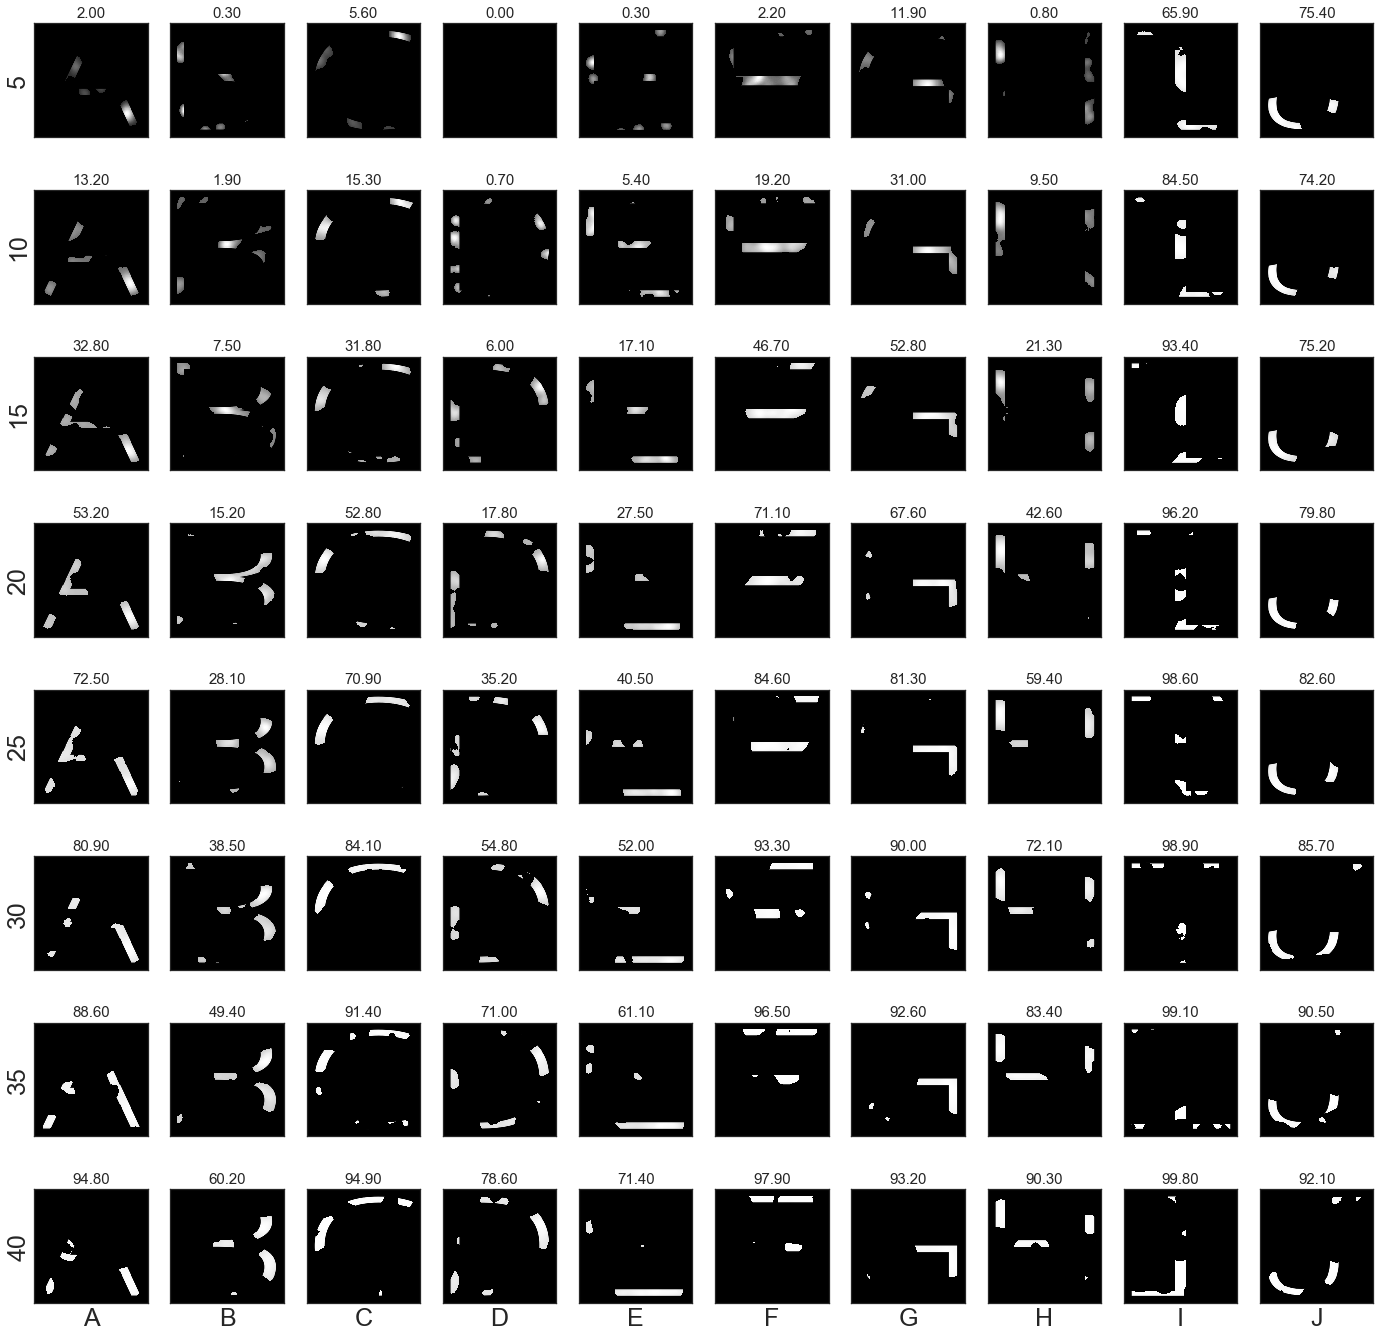

In [219]:
BUBBLE_DATA_PATH = "english_new_stim_1000Each"

def loadImage(path, resize):
    img = Image.open(path)
    img.load()
    if resize == True:
        img_resized = img.resize((32, 32), resample = PIL.Image.LANCZOS)
    else:
        img_resized = img
    img_data = np.asarray(img_resized)
#     finalImage = cleanGrayscaleImage(img_data)
    
#     return finalImage
    return img_data


allNumBubbles = list(range(5, 45, 5))
allAlphabets = ["A", 'B', "C", "D", "E", "F", "G", "H", "I", "J"]
fig, ax = plt.subplots(len(allNumBubbles), len(allAlphabets))
fig.set_size_inches(24, 24)

for row in range(len(allNumBubbles)):
    for column in range(len(allAlphabets)):
        numBubbles = allNumBubbles[row]
        alphabet = allAlphabets[column]
        correctStim = []
        incorrectStim = []
        for i in range(1000):
            file_path = BUBBLE_DATA_PATH + "/" + str(numBubbles) + "/" + alphabet + "/" + str(i) + ".png"
            bubbledStim = loadImage(file_path, True)
            plt.imshow(bubbledStim, cmap='gray')
            isCorrect = np.argmax(model.predict(bubbledStim.reshape((1, 32, 32, 1)))) == ord(alphabet) - ord("A")
#             print(isCorrect)
            maskPath = BUBBLE_DATA_PATH + "/" + str(numBubbles) + "/" + alphabet + "/" + "filter/" + str(i) + ".png"
            mask = loadImage(maskPath, False)
            if isCorrect:
                correctStim.append(mask)    
            else:
                incorrectStim.append(mask)   
        totalStim = correctStim + incorrectStim
        accuracy = len(correctStim)/len(totalStim)
        correctPlane = np.sum(correctStim, axis=0)
        totalPlane = np.sum(np.array(totalStim), axis=0)
        proportionPlane = np.divide(correctPlane, totalPlane)
        clipped = proportionPlane.copy()
#         clippingThreshold = getConfidenceIntervalThreshold(proportionPlane, 0.99)
#         clipped[clipped[:, :] < clippingThreshold] = 0
        clipped[clipped[:, :] < np.quantile(proportionPlane, 0.9)] = 0
        originalImagePath = "/Users/nishadsinghi/chetan_sir/finalStim100Each/{}.png".format(alphabet)
        originalImage = Image.open(originalImagePath)
        originalImageResized = originalImage.resize((224, 224), resample = PIL.Image.LANCZOS)
        final = np.multiply(clipped,originalImageResized)
        
        print("Alphabet: {}, Num bubbles: {}, accuracy: {}".format(alphabet, numBubbles, accuracy))
        ax[row][column].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
        ax[row][column].set_title("%.2f"%(accuracy*100), fontsize=15)
        ax[row][column].imshow(final, cmap='gray')
        if row == len(allNumBubbles) - 1:
            ax[row][column].set_xlabel(alphabet, fontsize=25)
        if column == 0:
            ax[row][column].set_ylabel(numBubbles, fontsize=25)
    
#     clipped_img = Image.fromarray(clipped * 255)
#     if clipped_img.mode != 'RGB':
#         clipped_img = clipped_img.convert('RGB')
#     clipped_img.save("diagnostic/{}_filter.png".format(alphabet))
#     final_img = Image.fromarray(final)
#     if final_img.mode != 'RGB':
#         final_img = final_img.convert('RGB')
#     final_img.save("diagnostic/{}.png".format(alphabet))


plt.savefig('CNN_english_allDiagnosticImages_90Percentile.png')

combine the data from all bubbles and compute diagnostic plane

Alphabet: A, accuracy: 0.5475
Alphabet: B, accuracy: 0.251375
Alphabet: C, accuracy: 0.5585
Alphabet: D, accuracy: 0.330125
Alphabet: E, accuracy: 0.344125
Alphabet: F, accuracy: 0.639375
Alphabet: G, accuracy: 0.6505
Alphabet: H, accuracy: 0.47425
Alphabet: I, accuracy: 0.9205
Alphabet: J, accuracy: 0.819375


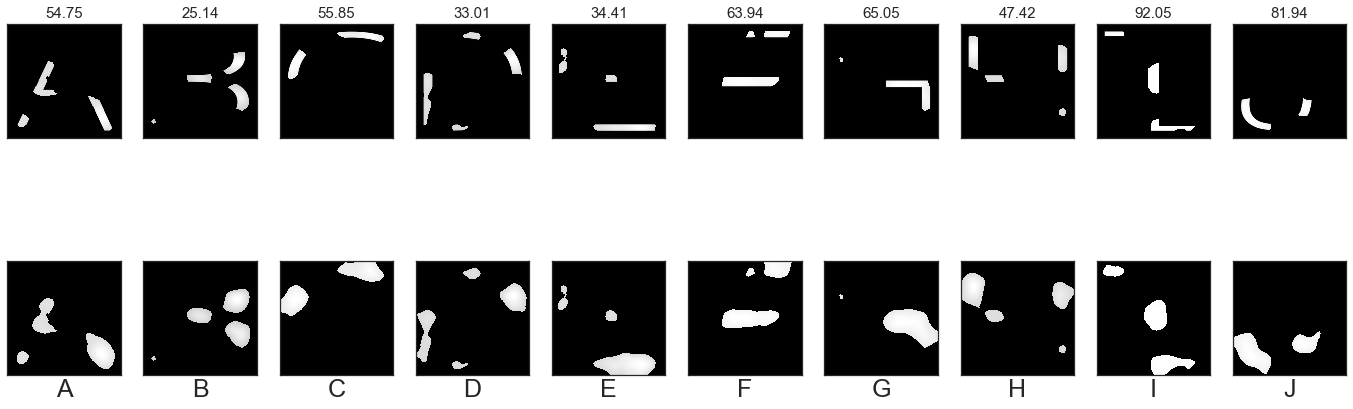

In [224]:
BUBBLE_DATA_PATH = "english_new_stim_1000Each"

def loadImage(path, resize):
    img = Image.open(path)
    img.load()
    if resize == True:
        img_resized = img.resize((32, 32), resample = PIL.Image.LANCZOS)
    else:
        img_resized = img
    img_data = np.asarray(img_resized)
#     finalImage = cleanGrayscaleImage(img_data)
    
#     return finalImage
    return img_data


allNumBubbles = list(range(5, 45, 5))
allAlphabets = ["A", 'B', "C", "D", "E", "F", "G", "H", "I", "J"]
fig, ax = plt.subplots(2, len(allAlphabets))
fig.set_size_inches(24, 8)

for column in range(len(allAlphabets)):
    alphabet = allAlphabets[column]
    correctStim = []
    incorrectStim = []
    for numBubbles in allNumBubbles:
        for i in range(1000):
            file_path = BUBBLE_DATA_PATH + "/" + str(numBubbles) + "/" + alphabet + "/" + str(i) + ".png"
            bubbledStim = loadImage(file_path, True)
            plt.imshow(bubbledStim, cmap='gray')
            isCorrect = np.argmax(model.predict(bubbledStim.reshape((1, 32, 32, 1)))) == ord(alphabet) - ord("A")
        #             print(isCorrect)
            maskPath = BUBBLE_DATA_PATH + "/" + str(numBubbles) + "/" + alphabet + "/" + "filter/" + str(i) + ".png"
            mask = loadImage(maskPath, False)
            if isCorrect:
                correctStim.append(mask)    
            else:
                incorrectStim.append(mask)   
    totalStim = correctStim + incorrectStim
    accuracy = len(correctStim)/len(totalStim)
    correctPlane = np.sum(correctStim, axis=0)
    totalPlane = np.sum(np.array(totalStim), axis=0)
    proportionPlane = np.divide(correctPlane, totalPlane)
    clipped = proportionPlane.copy()
#     clippingThreshold = getConfidenceIntervalThreshold(proportionPlane, 0.99)
    #         clipped[clipped[:, :] < clippingThreshold] = 0
    clipped[clipped[:, :] < np.quantile(proportionPlane, 0.9)] = 0
    originalImagePath = "/Users/nishadsinghi/chetan_sir/finalStim100Each/{}.png".format(alphabet)
    originalImage = Image.open(originalImagePath)
    originalImageResized = originalImage.resize((224, 224), resample = PIL.Image.LANCZOS)
    final = np.multiply(clipped,originalImageResized)

    print("Alphabet: {}, accuracy: {}".format(alphabet, accuracy))
    ax[0][column].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    ax[1][column].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    ax[0][column].set_title("%.2f"%(accuracy*100), fontsize=15)
    ax[0][column].imshow(final, cmap='gray')
    ax[1][column].imshow(clipped, cmap='gray')
    ax[1][column].set_xlabel(alphabet, fontsize=25)


#     clipped_img = Image.fromarray(clipped * 255)
#     if clipped_img.mode != 'RGB':
#         clipped_img = clipped_img.convert('RGB')
#     clipped_img.save("diagnostic/{}_filter.png".format(alphabet))
#     final_img = Image.fromarray(final)
#     if final_img.mode != 'RGB':
#         final_img = final_img.convert('RGB')
#     final_img.save("diagnostic/{}.png".format(alphabet))


# plt.savefig('CNN_english_allDiagnosticImages_90Percentile.png')